# Модели прогнозирования цен квартир

1. На основе количества метров
2. На основе расстояния до метро
3. С учётом квадратных метров и расстояния до метро


Для первых двух моделей на графиках отображены исходные и прогнозные значения.

Исходные и прогнозные значения сравниваются при помощи следующих характеристик качества:

- Средняя абсолютная ошибка прогноза (MAE)
- Среднеквадратическое отклонение (RMSE)
- Средний процент ошибки (MPE)
- Средняя относительная ошибка (MAPE)
- Абсолютное отклонение от среднего (AD)
- Среднее абсолютное отклонение (MAD)
- Коэффициент детерминации (R2)
- Коэффициент несоответствия Тейла (Theil Index)

In [1]:
import pandas as pd
df = pd.read_csv("flats.csv", delimiter=";")
df.head(10)

,area,metroDistance,price
0,28,677,7328400
1,54,120,9754600
2,43,1344,6781500
3,33,1003,6784100
4,30,591,7296200
5,45,719,8121900
6,55,406,8889400
7,63,216,9819000
8,27,2497,3924500
9,63,431,9642200


In [35]:
from math import sqrt

def getModelRatings(model, y):
    f = model.predict()
    res = {}
    res['MAE'] = sum(abs(yi - fi) for yi, fi in zip(y, f)) / len(y)
    res['RMSE'] = sqrt(sum((yi - fi)**2 for yi, fi in zip(y, f)) / len(y))
    res['MPE'] = sum((yi - fi)/yi for yi, fi in zip(y, f)) / len(y) * 100
    res['MAPE'] = sum(abs(yi - fi)/yi for yi, fi in zip(y, f)) / len(y) * 100
    yAv = sum(y)/len(y)
    res['AD'] = sum(abs(fi - yAv) for fi in f)
    res['MAD'] = res['AD']/len(y)
    res['R2'] = sum((fi - yAv)**2 for fi in f) / sum((yi - yAv)**2 for yi in y)
    res['Theil'] = sqrt(sum((yi - fi)**2 for yi, fi in zip(y,f)) / (sum(yi**2 for yi in y) + sum(fi**2 for fi in f)))
        
    return res

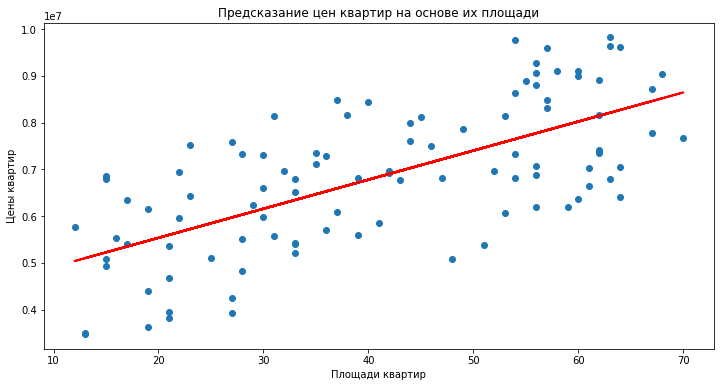

Метрики качества для предсказания цен квартир на основе их площади:
  MAE: 990261.94
  RMSE: 1141985.13
  MPE: -3.30
  MAPE: 15.69
  AD: 91939101.21
  MAD: 919391.01
  R2: 0.45
  Theil: 0.12


In [36]:
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import pyplot as plt

# Предсказание цен квартир на основе их площади

model = smf.ols('price ~ area', data=df)
model = model.fit()
pricePrediction = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(df['area'], df['price'], 'o')
plt.plot(df['area'], pricePrediction, 'r', linewidth=2)
plt.xlabel('Площади квартир')
plt.ylabel('Цены квартир')
plt.title('Предсказание цен квартир на основе их площади')

plt.show()

y = np.array(df['price'])
res1 = getModelRatings(model, y)
print('Метрики качества для предсказания цен квартир на основе их площади:')
for k, v in res1.items():
    print(f"  {k:s}: {v:.2f}")

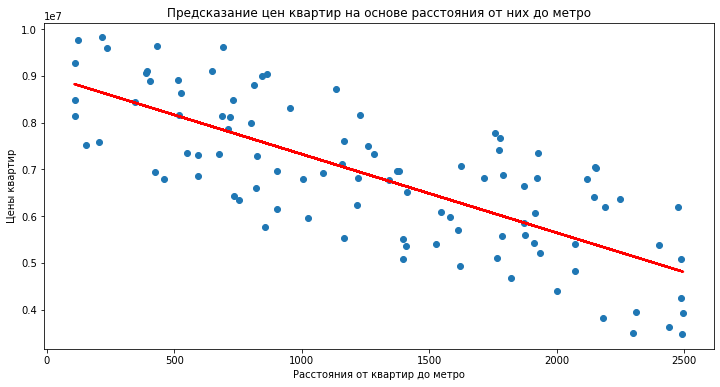

Метрики качества для предсказания цен квартир на основе расстояния от них до метро:
  MAE: 870605.16
  RMSE: 1002814.03
  MPE: -2.57
  MAPE: 13.78
  AD: 101989176.67
  MAD: 1019891.77
  R2: 0.58
  Theil: 0.10


In [38]:
# Предсказание цен квартир на основе расстояния от них до метро

model = smf.ols('price ~ metroDistance', data=df)
model = model.fit()
pricePrediction = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(df['metroDistance'], df['price'], 'o')
plt.plot(df['metroDistance'], pricePrediction, 'r', linewidth=2)
plt.xlabel('Расстояния от квартир до метро')
plt.ylabel('Цены квартир')
plt.title('Предсказание цен квартир на основе расстояния от них до метро')

plt.show()

y = np.array(df['price'])
res2 = getModelRatings(model, y)
print('Метрики качества для предсказания цен квартир на основе расстояния от них до метро:')
for k, v in res2.items():
    print(f"  {k:s}: {v:.2f}")

In [40]:
# Предсказание цен квартир на основе и расстояния, и площади

model = smf.ols('price ~ metroDistance + area', data=df)
model = model.fit()
pricePrediction = model.predict()

y = np.array(df['price'])
res3 = getModelRatings(model, y)
print('Метрики качества для предсказания цен квартир на основе и расстояния, и площади:')
for k, v in res3.items():
    print(f"  {k:s}: {v:.2f}")

Метрики качества для предсказания цен квартир на основе и расстояния, и площади:
  MAE: 188069.84
  RMSE: 231660.84
  MPE: -0.13
  MAPE: 2.85
  AD: 121653918.61
  MAD: 1216539.19
  R2: 0.98
  Theil: 0.02
